In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
#pyplot과 numpy를 단일 네임스페이스로 결합 but, 작업 시 네임스페이스를 구분하는 것을 추천.
rcParams['figure.figsize'] = 7,7 
#matplotlib.pylab의 rcParams 설정을 활용하면, 차트의 크기와 선의 색, 두께등의 기본값을 설정 가능
#figure.figsize : 순서대로 너비, 높이를 인치크기로 설정
import seaborn as sns #heatmap()함수 존재
import numpy as np
sns.set(color_codes=True, font_scale=1.2)
#sns.set : 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 설정.
#color_codes : seaborn palette이용 front_scale : 글꼴 크기

%matplotlib inline 
#jupyter notebook 실행시 브라우저에서 바로 그림을 볼수 있도록 하는 코드.
#구 버전의 주피터 노트북에 그래프를 표시하기 위해 필요한 설정
%config InlineBackend.figure_format = 'retina' #글씨 선명하게 출력하는 설정
#%load_ext autoreload 
# line 17,18 : IPython에서 코드 변경시 각 모듈을 자동으로 다시 로드하는 방법
#%autoreload 2


In [2]:
data = pd.read_csv('D:/3 여름학기/pca/Features to Detect Android Malware/5.9(type modificaiton).csv')

In [3]:
del data['duracion']
del data['avg_local_pkt_rate']
del data['avg_remote_pkt_rate']
normal=data[(data['type']==1)]
abnormal=data[(data['type']!=1)]
del data['type']
del normal['type']
del abnormal['type']
del normal['name']
del abnormal['name']

In [4]:
normal_cen=(normal-normal.mean())/normal.std()
abnormal_cen=(abnormal-normal.mean())/normal.std()

In [5]:
#SVD
U,D,W_t=np.linalg.svd(normal_cen)
W_t.T

array([[ 3.99729870e-01,  4.43910511e-02,  7.23788812e-04,
        -6.21364836e-04, -4.99882746e-03,  3.77662271e-02,
        -3.46290601e-03,  4.03613395e-01, -8.87797903e-02,
        -8.15752480e-01, -2.33142612e-02,  1.68176486e-14],
       [ 4.15082685e-02, -5.28360537e-01, -2.00483710e-01,
         8.35059751e-03, -7.95175041e-01, -1.28144279e-01,
         1.72205688e-01,  2.15275013e-02,  2.49396418e-03,
        -8.89664665e-06,  4.43984915e-05, -4.21799750e-17],
       [ 6.79661411e-02, -5.63324526e-01,  1.31917123e-01,
        -1.54437099e-02,  4.98869496e-01, -1.05490754e-01,
         6.32563123e-01,  1.62772781e-02,  2.30442582e-03,
        -4.71080464e-05,  8.22626118e-05, -7.79134777e-17],
       [ 3.68922486e-01, -1.55965610e-02, -5.20805498e-03,
        -2.53878637e-03, -3.66199133e-02,  4.26461435e-01,
         5.83540949e-02, -4.16834432e-01, -6.19751564e-02,
        -2.00373901e-02,  7.06406712e-01,  2.98401791e-14],
       [-1.63209398e-04, -9.48805545e-02,  9.0341328

In [38]:
W_df=pd.DataFrame(W_t.T, columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12"],index=normal.columns)
W_df=W_df.loc[:,'pc1':'pc2']
#W_pc1=pd.DataFrame(W_df['pc1':'pc2'])
W_df

,pc1,pc2
tcp_packets,0.399730,0.044391
dist_port_tcp,0.041508,-0.528361
external_ips,0.067966,-0.563325
vulume_bytes,0.368922,-0.015597
udp_packets,-0.000163,-0.094881
tcp_urg_packet,-0.002120,0.025418
source_app_packets,0.399954,0.031154
remote_app_packets,0.379402,0.066420
source_app_bytes,0.311179,0.082802
remote_app_bytes,0.369004,-0.024995


In [44]:
T_normal_2=np.dot(normal_cen, W_df)
T_normal_2=pd.DataFrame(T_normal_2,columns=["pc1","pc2"])
T_normal_2

,pc1,pc2
0,-0.451151,0.133270
1,-0.042672,-1.101116
2,0.046027,-0.495807
3,-0.569361,0.588394
4,-0.569411,0.588397
...,...,...
4699,-0.401346,0.592599
4700,-0.555936,0.589014
4701,-0.382395,0.186341
4702,-0.565321,0.588699


In [45]:
T_abnormal_2=np.dot(abnormal_cen, W_df)
T_abnormal_2=pd.DataFrame(T_abnormal_2,columns=["pc1","pc2"])
T_abnormal_2

,pc1,pc2
0,-0.605834,0.762929
1,-0.605838,0.762929
2,-0.560305,0.559261
3,-0.605821,0.762929
4,-0.604310,0.763204
...,...,...
3136,-0.603010,0.733183
3137,-0.575075,0.555507
3138,-0.603010,0.733183
3139,-0.603010,0.733183


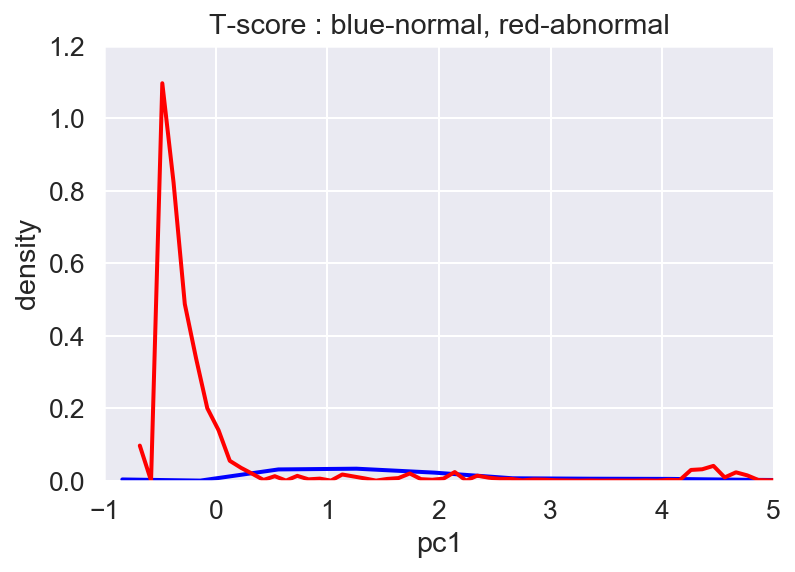

In [46]:
ax = sns.distplot(T_normal_2['pc1'], hist=False, color='blue', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
ax = sns.distplot(T_abnormal_2['pc1'], hist=False, color='red', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
plt.axis([-1, 5, 0, 1.2])
plt.title('T-score : blue-normal, red-abnormal')
ax.set_xlabel('pc1')
ax.set_ylabel('density')
plt.show()

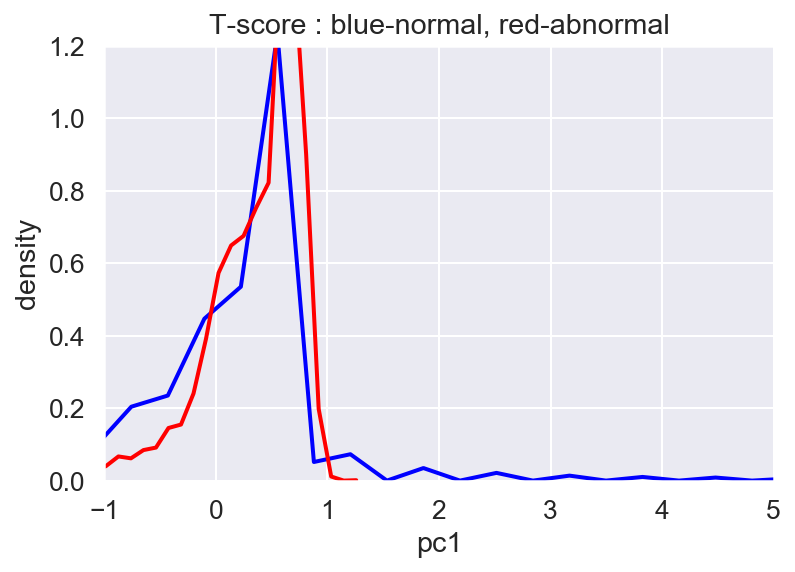

In [49]:
ax = sns.distplot(T_normal_2['pc2'], hist=False, color='blue', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
ax = sns.distplot(T_abnormal_2['pc2'], hist=False, color='red', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
plt.axis([-1, 5, 0, 1.2])
plt.title('T-score : blue-normal, red-abnormal')
ax.set_xlabel('pc1')
ax.set_ylabel('density')
plt.show()

In [47]:
Z_normal_2=(T_normal_2-T_normal_2.mean())/T_normal_2.std()
Z_abnormal_2=(T_abnormal_2-T_abnormal_2.mean())/T_abnormal_2.std()

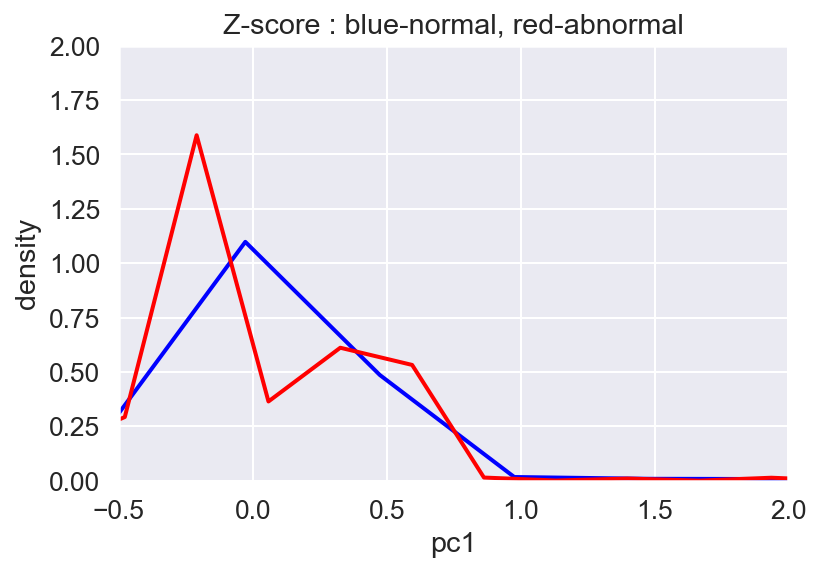

In [48]:
ax = sns.distplot(Z_normal_2, hist=False, color='blue', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
ax = sns.distplot(Z_abnormal_2, hist=False, color='red', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
plt.axis([-0.5, 2, 0, 2])
plt.title('Z-score : blue-normal, red-abnormal')
ax.set_xlabel('pc1')
ax.set_ylabel('density')
plt.show()

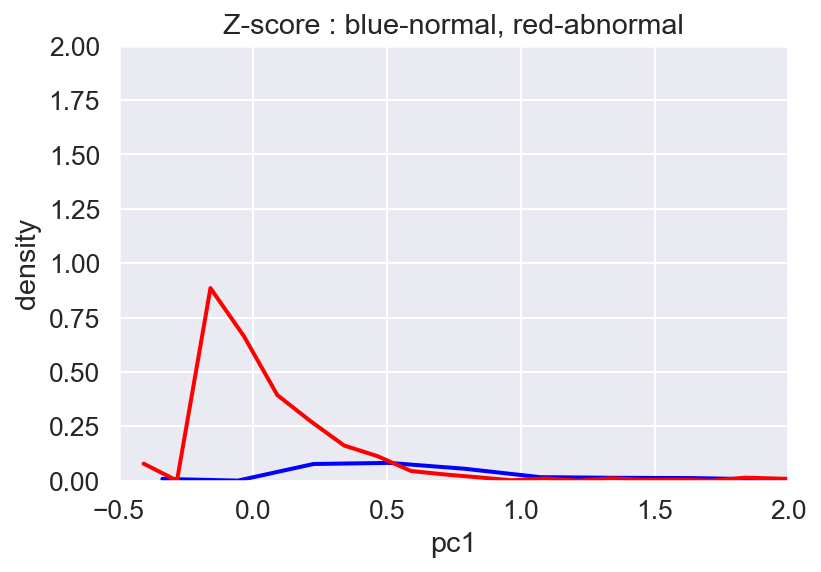

In [50]:
ax = sns.distplot(Z_normal_2['pc1'], hist=False, color='blue', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
ax = sns.distplot(Z_abnormal_2['pc1'], hist=False, color='red', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
plt.axis([-0.5, 2, 0, 2])
plt.title('Z-score : blue-normal, red-abnormal')
ax.set_xlabel('pc1')
ax.set_ylabel('density')
plt.show()

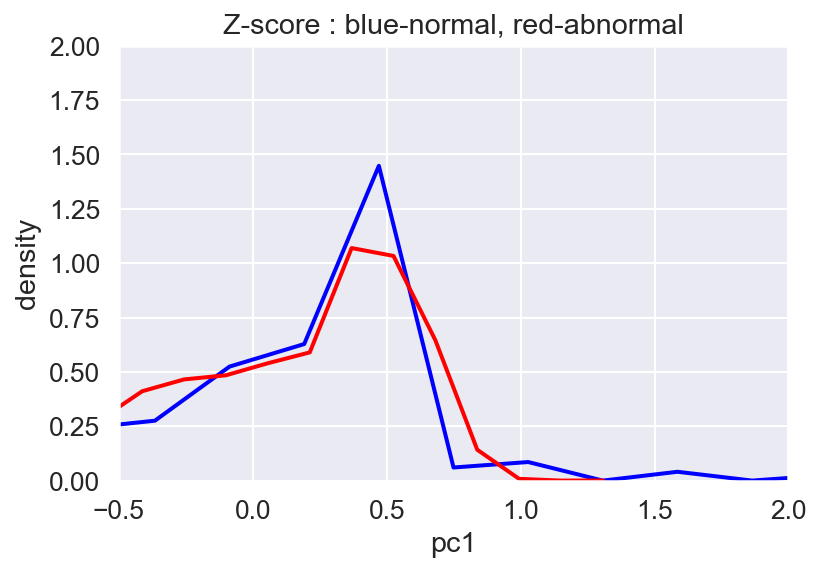

In [51]:
ax = sns.distplot(Z_normal_2['pc2'], hist=False, color='blue', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
ax = sns.distplot(Z_abnormal_2['pc2'], hist=False, color='red', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
plt.axis([-0.5, 2, 0, 2])
plt.title('Z-score : blue-normal, red-abnormal')
ax.set_xlabel('pc1')
ax.set_ylabel('density')
plt.show()

In [52]:
T_normal_2_mean=T_normal_2-T_normal_2.mean()

cov_T_2=np.dot(T_normal_2_mean.T, T_normal_2_mean)/len(T_normal_2)
inv_cov_T_2=np.linalg.inv(cov_T_2)
import math
DM_T_normal_2=np.dot(T_normal_2_mean, inv_cov_T_2)
DM_T_normal_2=np.dot(DM_T_normal_2, T_normal_2_mean.T)
DM_T_normal_2=np.sqrt(DM_T_normal_2)
DM_T_normal_2_diag=np.diag(DM_T_normal_2)
DM_T_normal_2_diag

C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


array([0.21453469, 0.93838461, 0.42286977, ..., 0.22138463, 0.55103032,
       0.13006832])

In [55]:
T_abnormal_2_mean=T_abnormal_2-T_normal_2.mean()
cov_T2_2=np.dot(T_abnormal_2_mean.T, T_abnormal_2_mean)/len(T_abnormal_2)
inv_cov_T2_2=np.linalg.inv(cov_T2_2)
DM_T_abnormal_2=np.dot(T_abnormal_2_mean, inv_cov_T2_2)
DM_T_abnormal_2=np.dot(DM_T_abnormal_2, T_abnormal_2_mean.T)
DM_T_abnormal_2=np.sqrt(DM_T_abnormal_2)
DM_T_abnormal_2_diag=np.diag(DM_T_abnormal_2)
DM_T_abnormal_2_diag

C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


array([1.00831061, 1.00831212, 0.79232138, ..., 0.97651933, 0.97651933,
       0.97651933])

Text(0.5, 0, 'deviation')

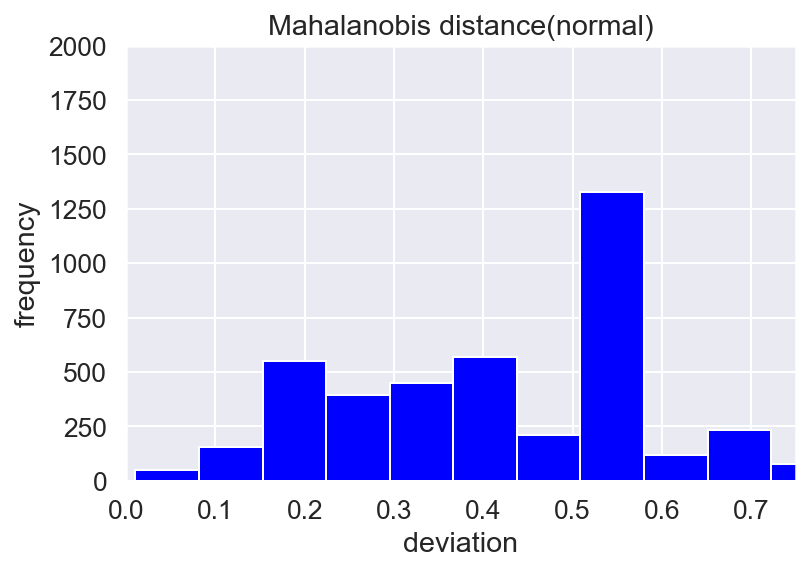

In [68]:
plt.hist(DM_T_normal_2_diag, bins=500, density=False,color='blue')
plt.axis([0, 0.75, 0,2000])
plt.title('Mahalanobis distance(normal)')
plt.ylabel('frequency')
plt.xlabel('deviation')

Text(0.5, 0, 'deviation')

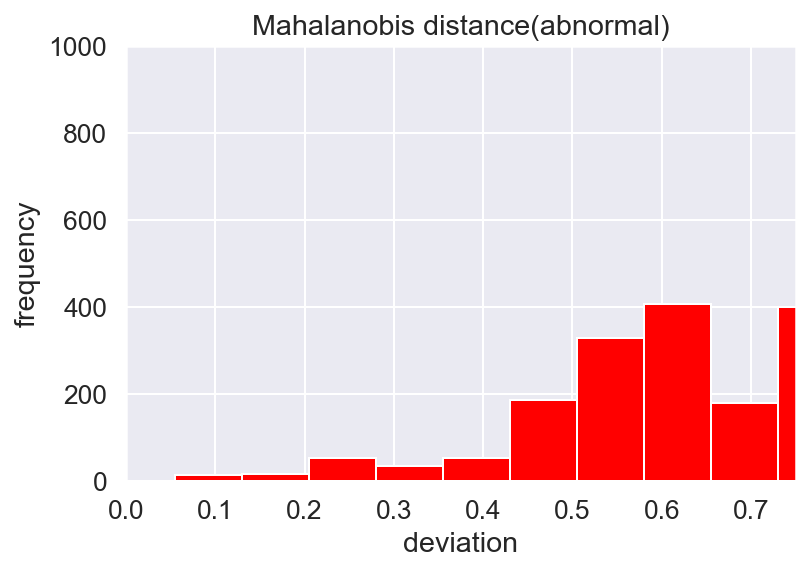

In [67]:
plt.hist(DM_T_abnormal_2_diag, bins=230, density=False,color='red')
plt.axis([0, 0.75, 0,1000])
plt.title('Mahalanobis distance(abnormal)')
plt.ylabel('frequency')
plt.xlabel('deviation')

In [70]:
n_sum=0
ab_sum=0

for i in range(0,4704):
    if 0.57<DM_T_normal_2_diag[i]:
        #if DM_T_abnormal_diag[i]<10:
        n_sum=n_sum+1
for i in range(0,3141):
    if DM_T_abnormal_2_diag[i]<0.57:
        ab_sum=ab_sum+1
n_per=n_sum/4704*100
ab_per=ab_sum/3141*100
print("threshold=",0.26)
print("abnormal로 감지되는 normal 데이터",n_sum,"/",'%.3f'% n_per,"%" )
print("normal로 감지되는 abnormal 데이터",ab_sum,"/",'%.3f'% ab_per,"%\n" )
diff=100-ab_per
diff2=100-n_per
print(diff, ab_per)
print(diff2, n_per)

threshold= 0.26
abnormal로 감지되는 normal 데이터 1018 / 21.641 %
normal로 감지되는 abnormal 데이터 601 / 19.134 %

80.86596625278574 19.134033747214264
78.35884353741497 21.641156462585034


In [11]:
Z_normal_pc1=(T_normal_pc1-T_normal_pc1.mean())/T_normal_pc1.std()
Z_abnormal_pc1=(T_abnormal_pc1-T_normal_pc1.mean())/T_normal_pc1.std()

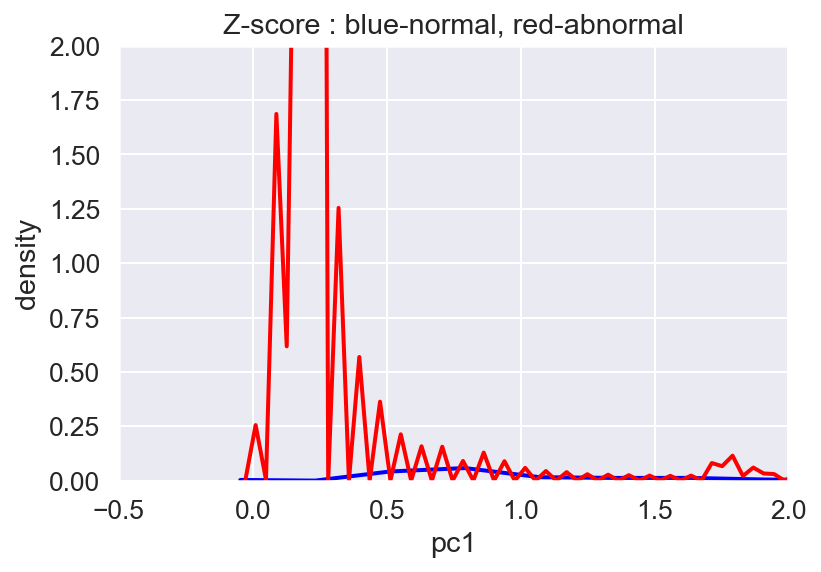

In [21]:
ax = sns.distplot(Z_normal_pc1, hist=False, color='blue', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
ax = sns.distplot(Z_abnormal_pc1, hist=False, color='red', hist_kws={'edgecolor': 'gray'}, kde_kws={'linewidth': 2})
plt.axis([-0.5, 2, 0, 2])
plt.title('Z-score : blue-normal, red-abnormal')
ax.set_xlabel('pc1')
ax.set_ylabel('density')
plt.show()

In [22]:
T_normal_pc1_mean=T_normal_pc1-T_normal_pc1.mean()

cov_T_pc1=np.dot(T_normal_pc1_mean.T, T_normal_pc1_mean)/len(T_normal_pc1)
inv_cov_T_pc1=np.linalg.inv(cov_T_pc1)
import math
DM_T_normal_pc1=np.dot(T_normal_pc1_mean, inv_cov_T_pc1)
DM_T_normal_pc1=np.dot(DM_T_normal_pc1, T_normal_pc1_mean.T)
DM_T_normal_pc1=np.sqrt(DM_T_normal_pc1)
DM_T_normal_pc1_diag=np.diag(DM_T_normal_pc1)
DM_T_normal_pc1_diag

C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


array([0.18201754, 0.01721614, 0.01856961, ..., 0.1542776 , 0.22807929,
       0.11987108])

In [23]:
T_abnormal_pc1_mean=T_abnormal_pc1-T_normal_pc1.mean()
cov_T2_pc1=np.dot(T_abnormal_pc1_mean.T, T_abnormal_pc1_mean)/len(T_abnormal_pc1)
inv_cov_T2_pc1=np.linalg.inv(cov_T2_pc1)
DM_T_abnormal_pc1=np.dot(T_abnormal_pc1_mean, inv_cov_T2_pc1)
DM_T_abnormal_pc1=np.dot(DM_T_abnormal_pc1, T_abnormal_pc1_mean.T)
DM_T_abnormal_pc1=np.sqrt(DM_T_abnormal_pc1)
DM_T_abnormal_pc1_diag=np.diag(DM_T_abnormal_pc1)
DM_T_abnormal_pc1_diag

C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


array([0.68820301, 0.68820729, 0.63648409, ..., 0.68499436, 0.68499436,
       0.68499436])